<a href="https://colab.research.google.com/github/AayushiJain05/machine_learning/blob/main/MNIST_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 step1: Import required libraries

In [2]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
data = pd.read_csv("/content/mnist_dataset.csv")

step 2:seperate features and labels

In [8]:
X = data.drop('pixel0', axis=1)
y = data['pixel0']

step3:filter only digits 0 and 1

In [17]:
binary_filter = (y == 0) | (y == 1)
X_binary = X[binary_filter]
y_binary = y[binary_filter]

In [12]:
print("Shape of binary data:", X_binary.shape)


Shape of binary data: (42000, 783)


step4:split data into train and test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_binary, y_binary, test_size=0.2, random_state=42
)


step5:train logistic regression model

In [25]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
import tensorflow as tf

# Load a subset of MNIST containing only 0s and 1s
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Filter for 0s and 1s
train_filter = (y_train == 0) | (y_train == 1)
test_filter = (y_test == 0) | (y_test == 1)

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Flatten the images to 1D vectors
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print("Shape of filtered and flattened training data:", x_train.shape)
print("Shape of filtered and flattened testing data:", x_test.shape)

Shape of filtered and flattened training data: (12665, 784)
Shape of filtered and flattened testing data: (2115, 784)


In [16]:
print("Unique values in y_binary:", y_binary.unique())

Unique values in y_binary: [0]


step6:make predictions

In [30]:
y_pred = model.predict(x_test)

step7:evaluate performance

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9990543735224586

Confusion Matrix:
 [[ 979    1]
 [   1 1134]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135

    accuracy                           1.00      2115
   macro avg       1.00      1.00      1.00      2115
weighted avg       1.00      1.00      1.00      2115



step7:visualise some predictions

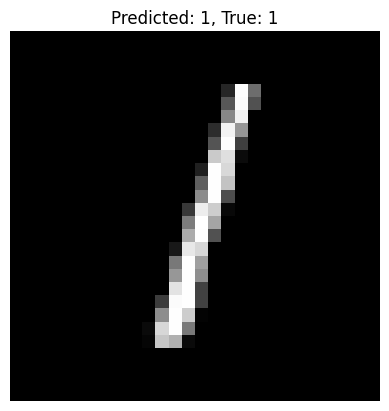

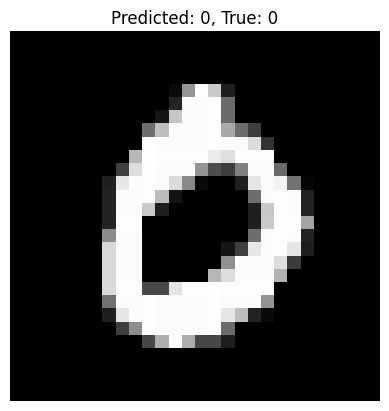

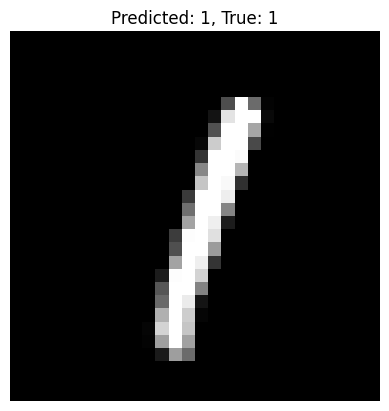

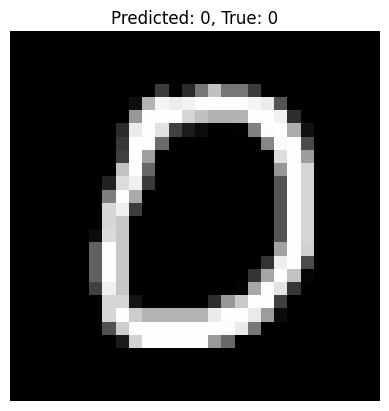

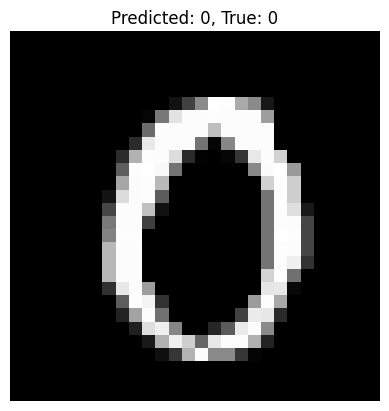

In [34]:
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}, True: {y_test[i]}")
    plt.axis('off')
    plt.show()